# Importing Libraries


In [41]:
import os
import librosa
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from tensorflow.image import resize

# Visual Single Audio

In [42]:
random_file = "./blues.00000.wav"

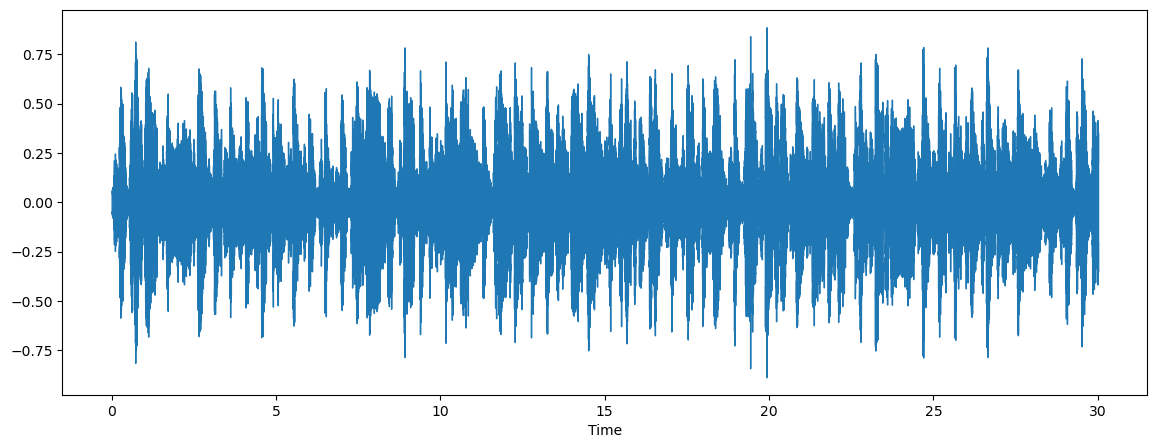

In [43]:
y, sr = librosa.load(random_file, sr=44100)
plt.figure(figsize=(14,5))
librosa.display.waveshow(y, sr=sr)

# playing Music in Notebook

In [44]:
from IPython.display import Audio
Audio(data=y, rate=sr)

In [45]:
y

array([ 0.00734921,  0.01335782,  0.01657648, ..., -0.07293833,
       -0.06308185, -0.03151622], dtype=float32)

# Visualization on Chunks of Audio

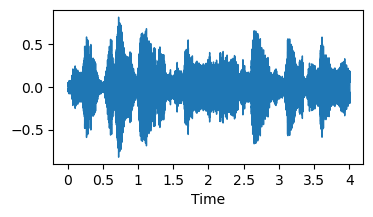

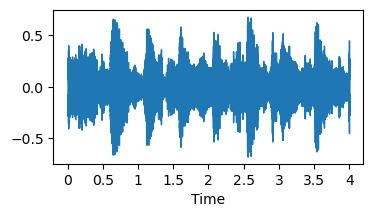

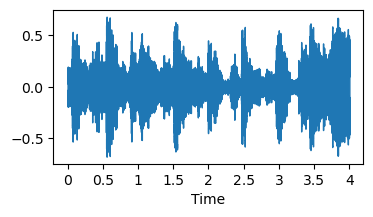

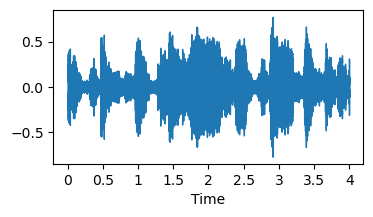

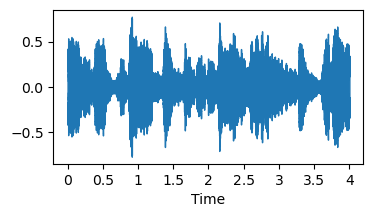

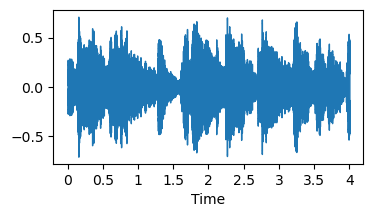

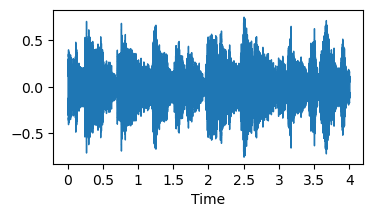

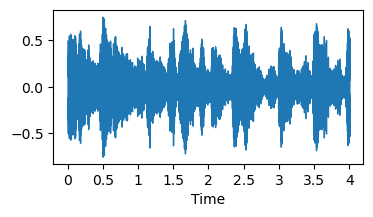

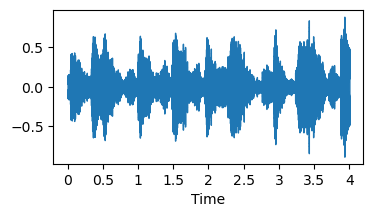

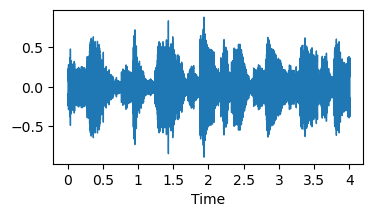

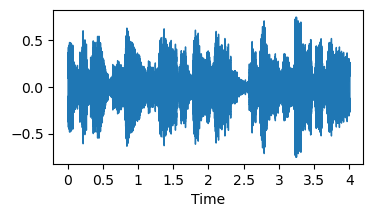

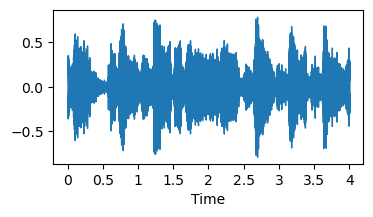

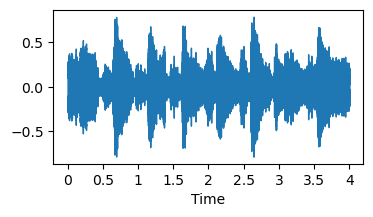

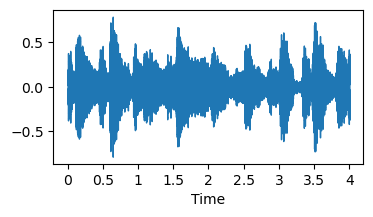

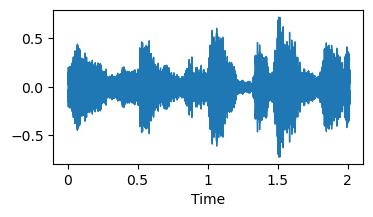

In [46]:
audio_path = "./blues.00000.wav"
y , sr = librosa.load(audio_path, sr=None) #sr = None to keep the original sampling rate

#Defining the duration of each chunk and overlap
chunk_duration = 4 #seconds
overlap_duration = 2 # seconds

#convert durations to samples
chunk_samples =  chunk_duration * sr
overlap_samples =  overlap_duration * sr

# calculate the number of chunks
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

#iterating each chunk
for i in range(num_chunks):
    #calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples

    #extract the chunk of audio
    chunk = y[start:end]
    plt.figure(figsize=(4,2))
    librosa.display.waveshow(chunk, sr = sr)
    plt.show()

# Melspectrogram Visualization on Entire Audio


In [47]:
# Plotting Melspectrogram for entrire audio
def plot_Melspectrogram(y, sr):
    #compute Spectrogram
    spectrogram = librosa.feature.melspectrogram(y = y, sr = sr)
    #Convert to decibels (log Scale)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    #Visualize the spectrogram
    plt.figure(figsize=(10,4))
    librosa.display.specshow(spectrogram_db, sr = sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%2.0f db')
    plt.title('Spectogram')
    plt.tight_layout()
    plt.show()

In [48]:
random_file_name = "./blues.00000.wav"
y, sr = librosa.load(random_file_name, sr = 44100)

In [49]:
plot_Melspectrogram(y, sr)

# Melspectrogram  Visaulization on Chunks

In [50]:
def plot_Melspectrogram_chunks(y, sr):
    # define the duration of each chunk and overlap
    chunk_duration = 4
    overlap_duration = 2

    # convert duration to sample
    chunk_samples = chunk_duration *  sr
    overlap_samples = overlap_duration * sr

    # Calculate the number of chunks
    num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

    #iterate over each chunks
    for i in range(num_chunks):
        #calculate start/end indices
        start = i * (chunk_samples - overlap_samples)
        end = start + chunk_samples

        #extrating chunks
        chunk = y[start : end]
        #Melspectogram 
        spectogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
        print(spectogram.shape)
        spectogram_db = librosa.power_to_db(spectogram, ref=np.max)
        #Visualize the spectogram
        plt.figure(figsize=(10,4))
        librosa.display.specshow(spectogram_db, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format = '%2.0f db')
        plt.title('spectogram')
        plt.tight_layout()
        plt.show()

In [51]:
random_file_name = "./blues.00000.wav"
y, sr = librosa.load(random_file_name, sr = 44100)

(128, 345)


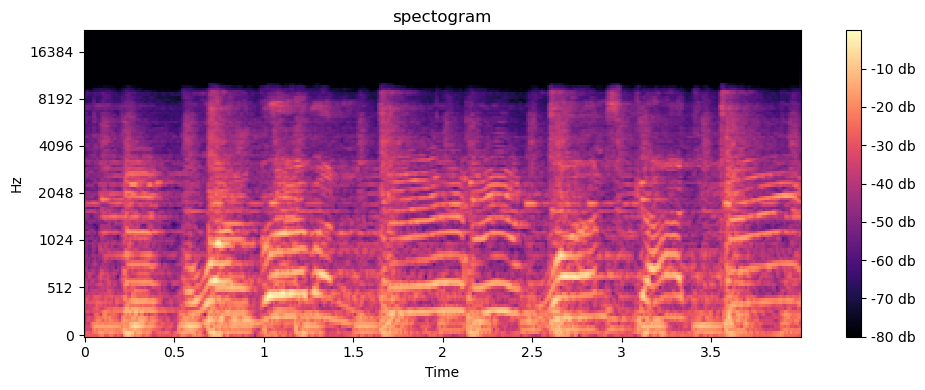

(128, 345)


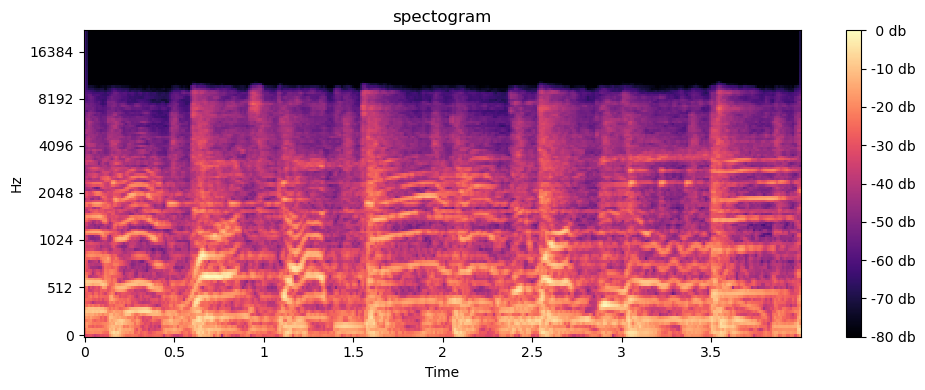

(128, 345)


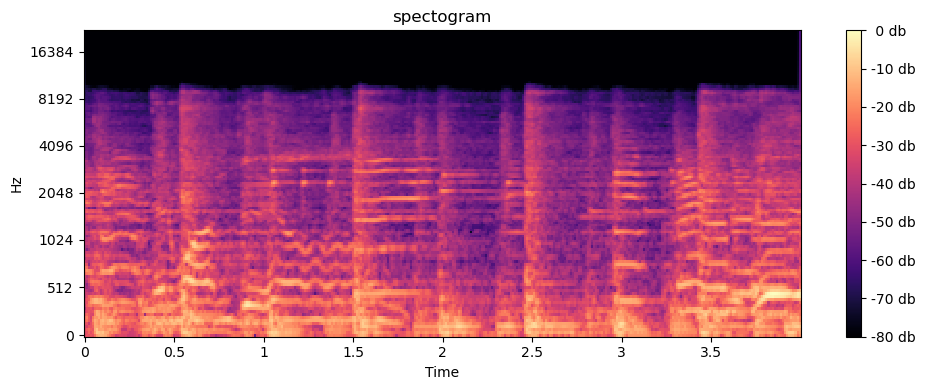

(128, 345)


(128, 345)


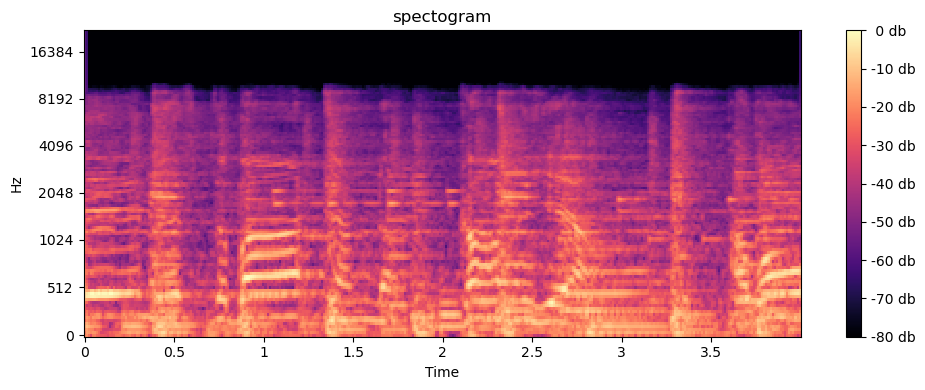

(128, 345)


(128, 345)


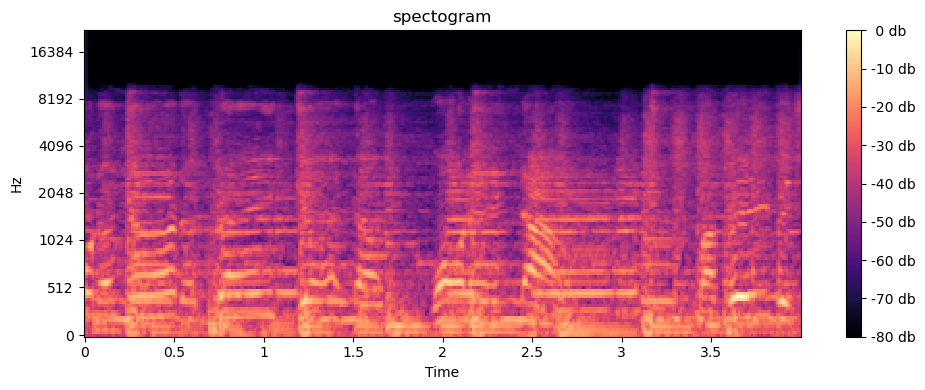

(128, 345)


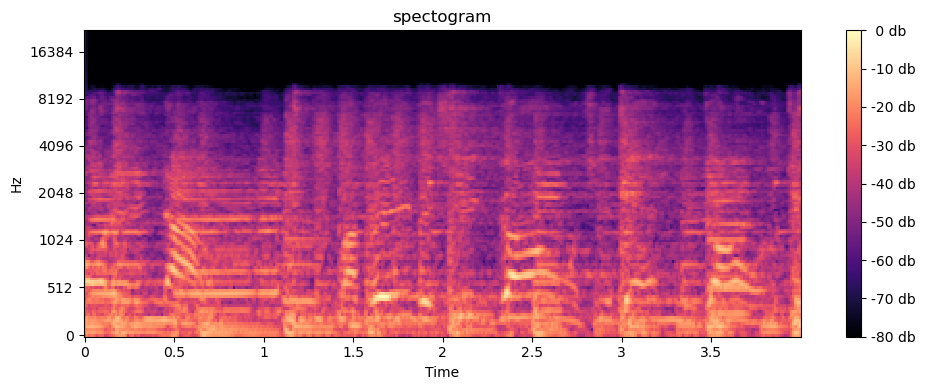

(128, 345)


(128, 345)


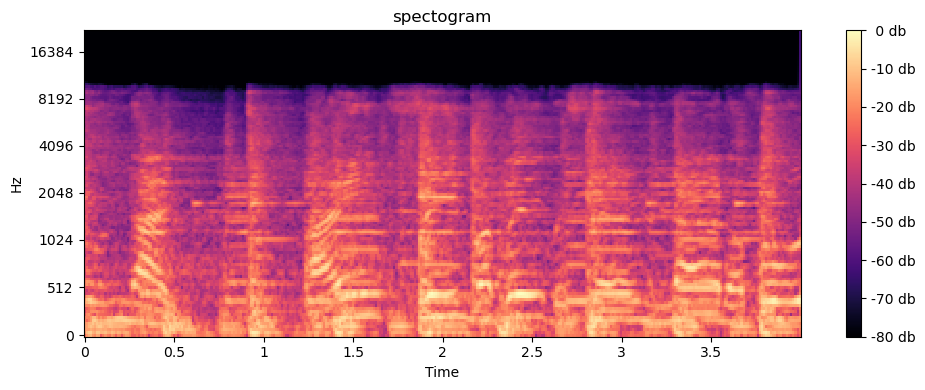

(128, 345)


(128, 345)


(128, 345)


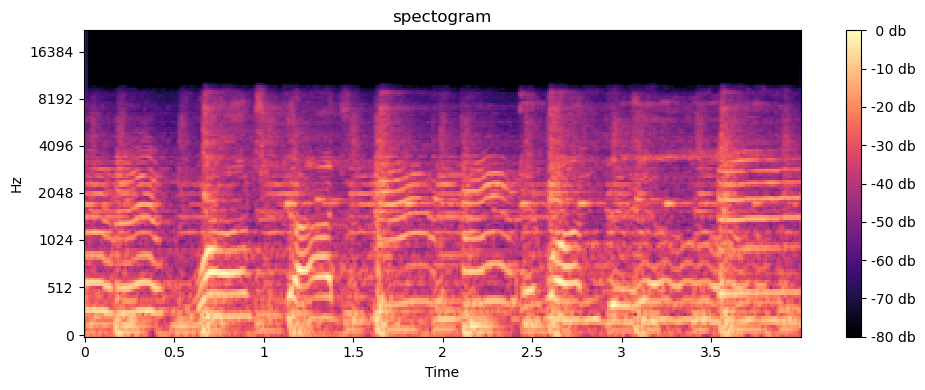

(128, 345)


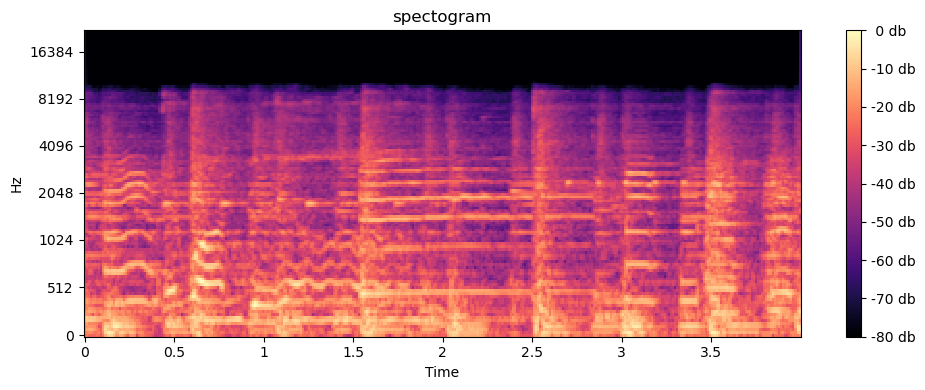

(128, 174)


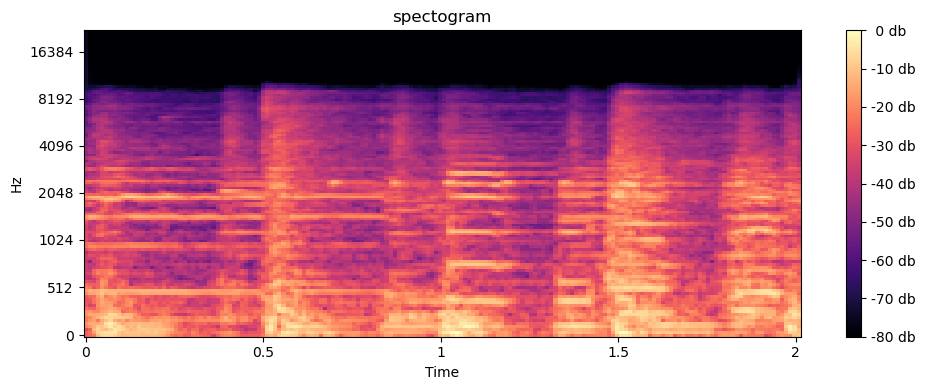

In [52]:
plot_Melspectrogram_chunks(y, sr)

In [61]:
150 * 150


22500

In [62]:
210 * 210

44100

# Data Preprocessing - Final


In [53]:
# Folder Structure
data_dir = "./Data/genres_original" 
classes = ['blues', 'classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [63]:

# load and process data
def load_process_data(data_dir, classes, target_shape=(210,210)):
    data = []
    labels = []

    for i_class, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        print("Processing.....", class_name)
        
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                try:
                    # Load the audio file
                    audio_data, sample_rate = librosa.load(file_path, sr=None)

                    # Preprocessing: Define chunk duration and overlap
                    chunk_duration = 4
                    overlap_duration = 2

                    # Convert duration to samples
                    chunk_samples = chunk_duration * sample_rate
                    overlap_samples = overlap_duration * sample_rate

                    # Calculate the number of chunks
                    num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

                    # Iterate over each chunk
                    for i in range(num_chunks):
                        # Calculate the start and end indices of the chunk
                        start = i * (chunk_samples - overlap_samples)
                        end = start + chunk_samples
                        
                        # Ensure the chunk doesn't exceed the audio length
                        if end > len(audio_data):
                            end = len(audio_data)
                        
                        # Extract the chunk of audio
                        chunk = audio_data[start:end]

                        # If chunk is smaller than expected due to boundary, pad with zeros
                        if len(chunk) < chunk_samples:
                            chunk = np.pad(chunk, (0, chunk_samples - len(chunk)))

                        # Mel spectrogram part
                        mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sample_rate)

                        # Resize the matrix to the provided target shape
                        mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)

                        # Append the data and labels to their respective lists
                        data.append(mel_spectrogram)
                        labels.append(i_class)

                except Exception as e:
                    print(f"Error processing {file_path}: {e}")
    
    # Return the processed data and labels
    return np.array(data), np.array(labels)


In [64]:
data,labels = load_process_data(data_dir,classes)

Processing..... blues
Processing..... classical
Processing..... country
Processing..... disco
Processing..... hiphop
Processing..... jazz
Processing..... metal
Processing..... pop
Processing..... reggae
Processing..... rock


In [65]:
data.shape

(14975, 210, 210, 1)

In [66]:
labels.shape

(14975,)